
Gaussian Denoiser Results:


,DenoiserType,Parameter,ImageIndex,Channel,PSNR,SI-PSNR,SSIM,Runtime,RAM Usage
0,Gaussian,sigma = 2.5,001,0,29.22,31.89,0.8941,0.0067 s,8.98 MB
1,Gaussian,sigma = 2.5,001,1,30.20,31.51,0.8087,0.0031 s,0.56 MB
2,Gaussian,sigma = 2.5,001,2,29.09,31.75,0.7994,0.0052 s,0.97 MB
3,Gaussian,sigma = 2.5,002,0,37.43,38.64,0.9795,0.0034 s,0.41 MB
4,Gaussian,sigma = 2.5,002,1,41.01,41.42,0.9779,0.0031 s,0.00 MB
5,Gaussian,sigma = 2.5,002,2,37.45,39.97,0.9642,0.0032 s,0.50 MB
6,Gaussian,sigma = 3,001,0,29.37,31.20,0.8924,0.0037 s,0.02 MB
7,Gaussian,sigma = 3,001,1,31.52,31.69,0.8142,0.0035 s,0.50 MB
8,Gaussian,sigma = 3,001,2,30.60,33.03,0.8380,0.0038 s,0.03 MB
9,Gaussian,sigma = 3,002,0,35.44,37.64,0.9754,0.0036 s,0.00 MB


Results saved to /Users/Matthieu/Documents/GitHub/ML4Science-CS433/output/tables/Gaussian_denoiser_results.csv

Average Gaussian Results:


,DenoiserType,Parameter,Channel,PSNR,SI-PSNR,SSIM,Runtime,RAM Usage
0,Gaussian,sigma = 2.5,0,33.33,35.26,0.9368,0.0050 s,4.70 MB
1,Gaussian,sigma = 2.5,1,35.61,36.46,0.8933,0.0031 s,0.28 MB
2,Gaussian,sigma = 2.5,2,33.27,35.86,0.8818,0.0042 s,0.73 MB
3,Gaussian,sigma = 3,0,32.41,34.42,0.9339,0.0036 s,0.01 MB
4,Gaussian,sigma = 3,1,36.01,36.15,0.8949,0.0036 s,0.25 MB
5,Gaussian,sigma = 3,2,34.96,36.36,0.9033,0.0038 s,0.27 MB
6,Gaussian,sigma = 3.5,0,32.69,33.33,0.9288,0.0042 s,0.05 MB
7,Gaussian,sigma = 3.5,1,35.53,35.76,0.8926,0.0041 s,0.51 MB
8,Gaussian,sigma = 3.5,2,34.54,36.52,0.9145,0.0040 s,0.01 MB


Results saved to /Users/Matthieu/Documents/GitHub/ML4Science-CS433/output/tables/average_Gaussian_denoiser_results.csv

Image002 - Gaussian:


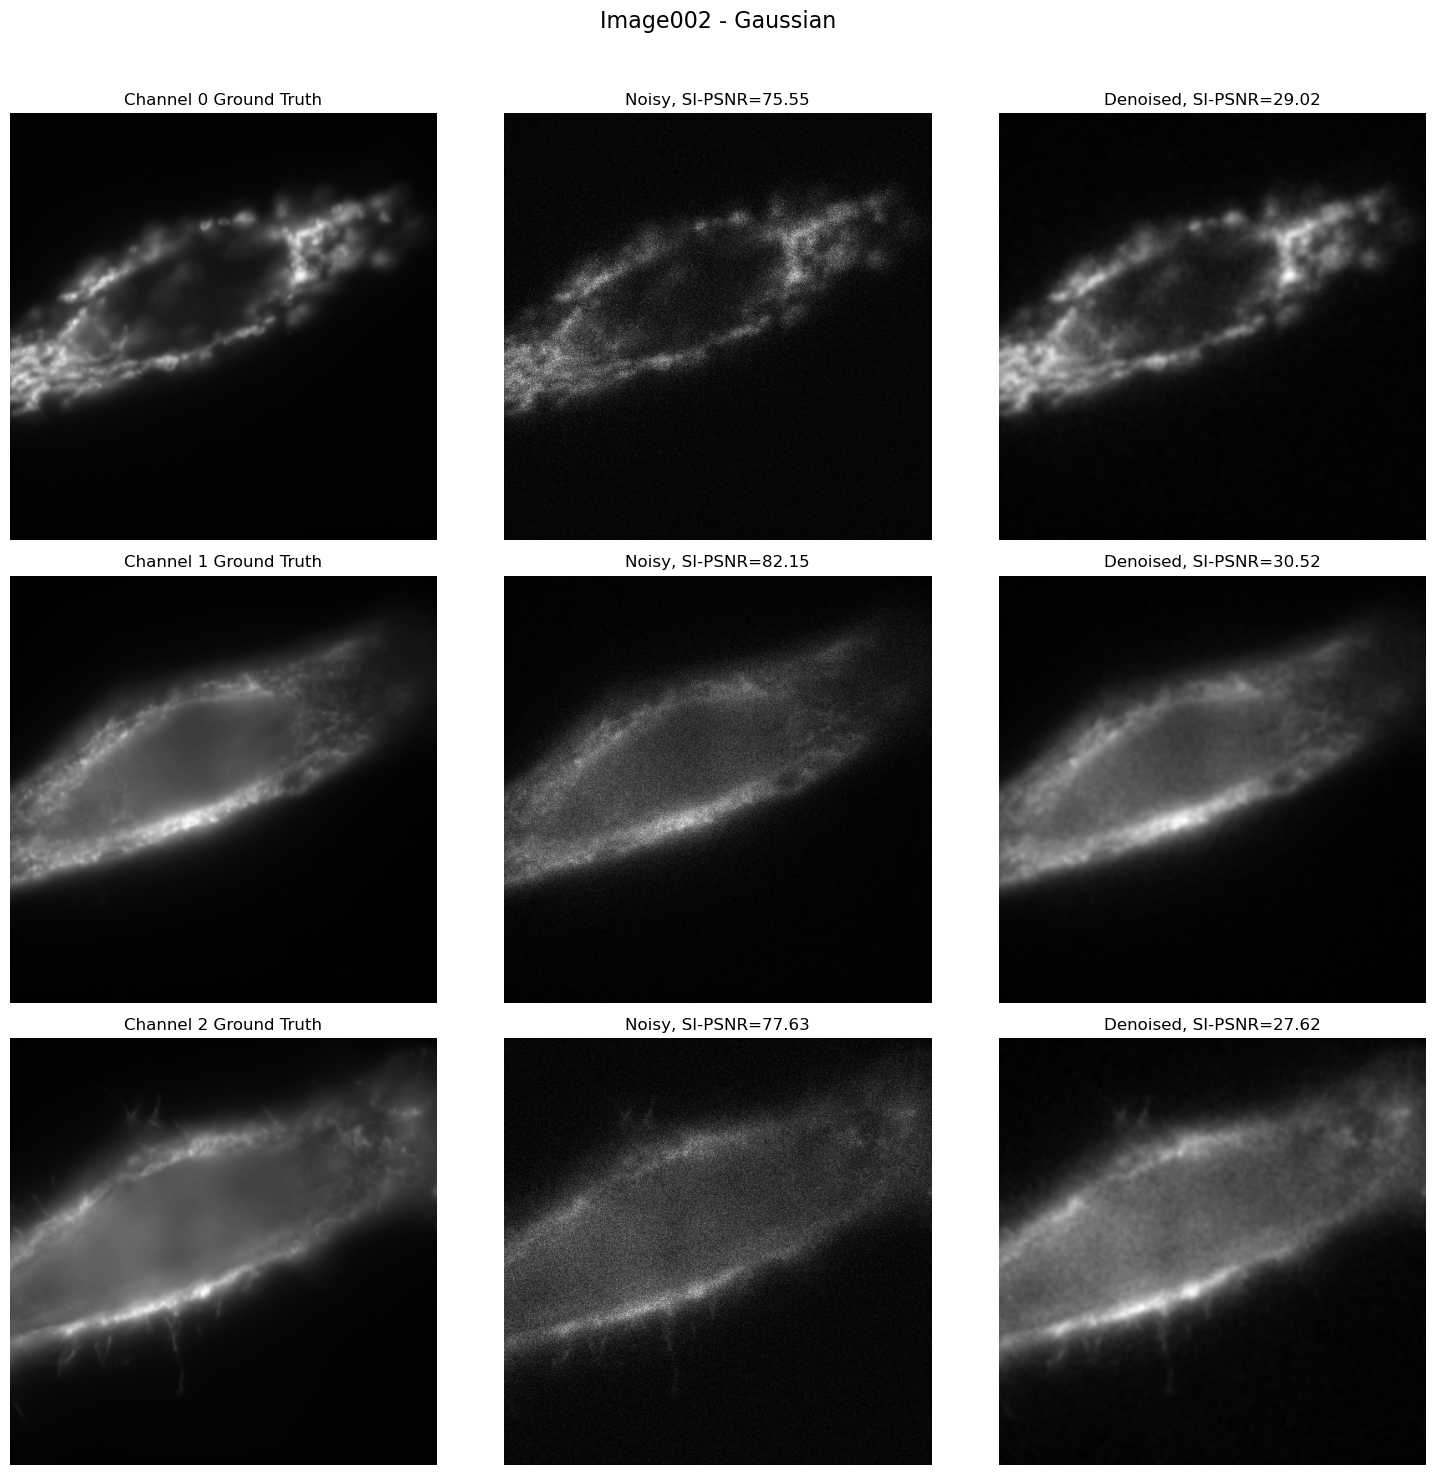

Plot saved to /Users/Matthieu/Documents/GitHub/ML4Science-CS433/output/plots/Image002_-_Gaussian.png


In [2]:
from functions import *

def main():
    """Main script to evaluate denoisers and save results."""
    # Get paths
    data_path, output_path = get_paths()

    # Define global parameter ranges
    PARAMETER_RANGES = {
        "Gaussian": {"param_name": "sigma", "values": [2.5, 3, 3.5]},
        "Median": {"param_name": "size", "values": [5, 8, 10]},
        "TV-Chambolle": {"param_name": "weight", "values": [0.05, 0.1, 0.2]},
        "Wavelet": {"param_name": None, "values": None},  # Use default parameters
        "NL-Means": {"param_name": None, "values": None},  # Use default parameters
        "TV-ISO": {"param_name": "lmbda", "values": [0.05, 0.08, 0.1]}
    }

    disable_progress = True  # Set to False to enable progress bar

    # Choose denoiser
    denoiser_name = "Gaussian"  # "Gaussian", "Median", "TV-Chambolle", "Wavelet", "NL-Means", or "TV-ISO"

    # Run the denoising pipeline
    run_denoising_pipeline(data_path, output_path, denoiser_name, PARAMETER_RANGES, disable_progress)

if __name__ == "__main__":
    main()